In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install --upgrade lazypredict

# **Librerias**

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score , mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from lazypredict.Supervised import LazyRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# **Cargar y explorar datos**

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Analytics/Project/Car_Performs/car_data.csv')

In [38]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.00,2.50,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.00,2.50,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.00,2.50,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.00,2.00,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.00,2.00,fwd,gas,32,mazda,cx-5 2wd,a,2014


**Diccionario de datos**

In [6]:
#city_mpg: Fuel efficiency in miles per gallon (mpg) for city driving, crucial for urban driving analysis.
#highway_mpg: Fuel efficiency in mpg for highway driving, ideal for comparing long-distance performance.
#combination_mpg: The combined fuel efficiency for both city and highway driving, a critical metric for overall vehicle performance.
#cylinders & displacement: Engine specifications that help understand a car's power and fuel consumption.
#drive: The type of drivetrain (e.g., FWD, AWD), key for determining the car's handling and terrain suitability.
#fuel_type: The type of fuel (e.g., gasoline, electric), important for environmental impact studies.
#make & model: Car manufacturer and model, enabling brand-specific analysis and comparison.
#year: The production year of the vehicle, useful for tracking trends and technological improvements over time.

**Analisis exploratorio de datos**

In [39]:
df.describe()

,city_mpg,combination_mpg,cylinders,displacement,highway_mpg,year
count,550.00,550.00,548.00,548.00,550.00,550.00
mean,21.46,24.07,5.32,2.93,28.61,2019.00
std,8.15,7.48,1.76,1.25,6.83,3.17
min,11.00,14.00,3.00,1.20,18.00,2014.00
25%,17.00,20.00,4.00,2.00,24.00,2016.00
50%,20.00,23.00,4.00,2.50,28.00,2019.00
75%,24.00,27.00,6.00,3.50,32.00,2022.00
max,126.00,112.00,12.00,6.80,102.00,2024.00


In [40]:
df.describe(include='object')

,class,drive,fuel_type,make,model,transmission
count,550,550,550,550,550,550
unique,13,4,3,31,276,2
top,small sport utility vehicle,awd,gas,bmw,veloster,a
freq,157,215,546,72,12,467


In [41]:
df.isnull().sum()

,0
city_mpg,0
class,0
combination_mpg,0
cylinders,2
displacement,2
drive,0
fuel_type,0
highway_mpg,0
make,0
model,0


In [42]:
df_nulo_cylinders = df[df['cylinders'].isnull()]
df_nulo_cylinders

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
128,126,subcompact car,112,NaN,NaN,rwd,electricity,99,mitsubishi,i-miev,a,2016
175,121,subcompact car,112,NaN,NaN,rwd,electricity,102,mitsubishi,i-miev,a,2017


In [43]:
df['fuel_type'].value_counts()

,count
fuel_type,
gas,546
diesel,2
electricity,2


In [ ]:
#Segmento A [SUV] ---------------------------------------(small sport utility vehicle, standard sport utility vehicle )
#Segmento B [Automóviles de Pasajeros] ------------------(minicompact car, subcompact car, compact car, midsize car, large car, minivan)
#Segmento C [Automóviles Especiales] --------------------(two seater)
#Segmento D [Estaciones de Carga] -----------------------(small station wagon, midsize station wagon)
#Segmento E [Camionetas] --------------------------------(standard pickup truck, small pickup truck)
#########################################################################################################################################
#Eliminar los valores nulos, y consigo los vehiculos de "fuel_type" disel.

In [44]:
df.value_counts('class')

,count
class,
small sport utility vehicle,157
subcompact car,85
compact car,83
two seater,69
midsize car,53
standard sport utility vehicle,34
minicompact car,21
large car,13
small station wagon,11


In [45]:
df['drive'].value_counts()

,count
drive,
awd,215
fwd,178
rwd,115
4wd,42


# **Pre-procesamiento de datos**

In [46]:
#Borrar nulos de la columna "cylinders"
df = df.dropna(subset=['cylinders'])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 548 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         548 non-null    int64  
 1   class            548 non-null    object 
 2   combination_mpg  548 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            548 non-null    object 
 6   fuel_type        548 non-null    object 
 7   highway_mpg      548 non-null    int64  
 8   make             548 non-null    object 
 9   model            548 non-null    object 
 10  transmission     548 non-null    object 
 11  year             548 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 55.7+ KB


In [48]:
#Borrar la columna "fuel_type"
df = df.drop('fuel_type', axis=1)

In [49]:
#Funcion para llevar años a años de uso
def tiempo_uso(df, columna_ano, ano_actual=2024):

    df['year'] = ano_actual - df[columna_ano]
    return df

In [50]:
tiempo_uso(df, 'year')

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.00,2.50,fwd,36,mazda,6,m,10
1,26,midsize car,30,4.00,2.50,fwd,37,mazda,6,a,10
2,25,small sport utility vehicle,27,4.00,2.50,fwd,31,mazda,cx-5 2wd,a,10
3,26,small sport utility vehicle,29,4.00,2.00,fwd,34,mazda,cx-5 2wd,m,10
4,26,small sport utility vehicle,28,4.00,2.00,fwd,32,mazda,cx-5 2wd,a,10
...,...,...,...,...,...,...,...,...,...,...,...
545,23,compact car,27,4.00,2.00,awd,33,bmw,430i xdrive gran coupe,a,0
546,21,midsize car,24,6.00,3.00,rwd,29,bmw,840i gran coupe,a,0
547,21,midsize car,24,6.00,3.00,awd,29,bmw,840i xdrive gran coupe,a,0
548,17,midsize car,19,8.00,4.40,awd,24,bmw,m850i xdrive gran coupe,a,0


In [51]:
#Funcion para codificar variables categoricas
def label_encoder(df, columna):
    label_encoder = LabelEncoder()
    df[columna] = label_encoder.fit_transform(df[columna])
    return df

In [52]:
for columna in df.columns:
    if df[columna].dtype == 'object':
        df = label_encoder(df, columna)

In [53]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,highway_mpg,make,model,transmission,year
0,25,2,29,4.00,2.50,2,36,19,15,1,10
1,26,2,30,4.00,2.50,2,37,19,15,0,10
2,25,7,27,4.00,2.50,2,31,19,74,0,10
3,26,7,29,4.00,2.00,2,34,19,74,1,10
4,26,7,28,4.00,2.00,2,32,19,74,0,10


In [54]:
df_corr = df.corr()

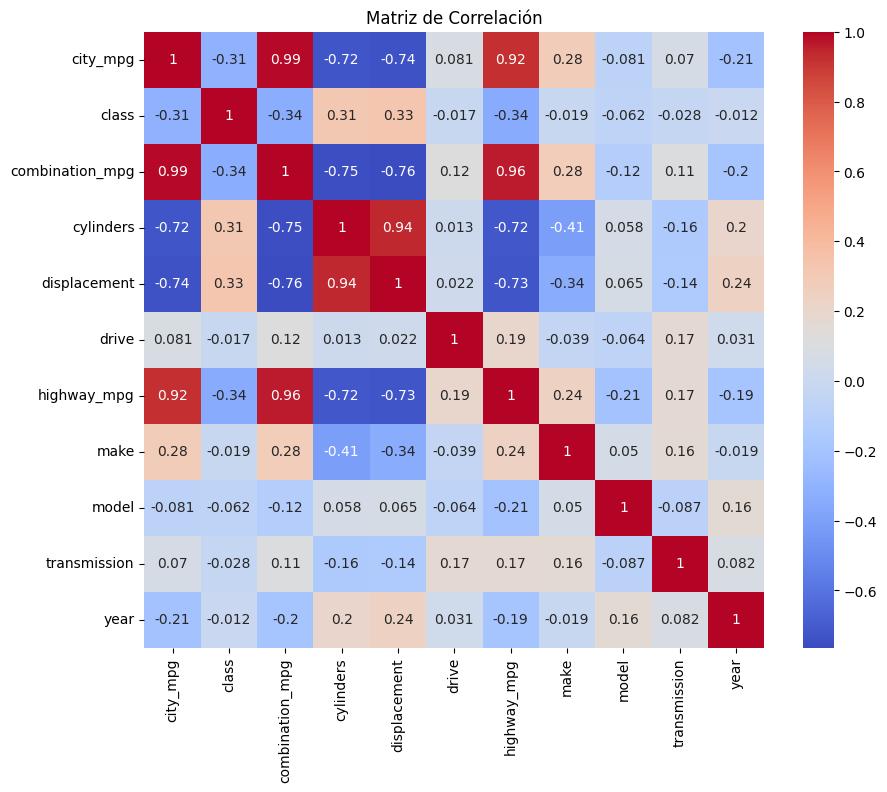

In [55]:
fig = plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

In [56]:
target_corr = df_corr['combination_mpg'].sort_values(ascending=False)
print(target_corr)

combination_mpg    1.00
city_mpg           0.99
highway_mpg        0.96
make               0.28
drive              0.12
transmission       0.11
model             -0.12
year              -0.20
class             -0.34
cylinders         -0.75
displacement      -0.76
Name: combination_mpg, dtype: float64


In [57]:
X = df.drop('combination_mpg', axis=1)
y = df['combination_mpg']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Modelos**

**LinearRegression**

In [59]:
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

LinearRegression()

In [60]:
def evaluar_modelo(modelo, X_train, y_train, X_test, y_test):
  modelo_score = modelo.score(X_test, y_test)
  lr_r2 = r2_score(y_test, modelo.predict(X_test))
  mae = mean_absolute_error(y_test, modelo.predict(X_test))
  mse = mean_squared_error(y_test, modelo.predict(X_test))
  rmse = np.sqrt(mse)
  print(f'Score: {modelo_score}')
  print(f'R2: {lr_r2}')
  print(f'mean_absolute_error: {mae}')
  print(f'mean_squared_error: {mse}')
  print(f'R_mean_squared_error: {rmse}')

**Evaluacion del modelo**

In [61]:
evaluar_modelo(modelo_lr, X_train, y_train, X_test, y_test)

Score: 0.9949034402408948
R2: 0.9949034402408948
mean_absolute_error: 0.30280508877149376
mean_squared_error: 0.13671247771663794
R_mean_squared_error: 0.3697465046712923


In [62]:
lr_y_pred = modelo_lr.predict(X_test)

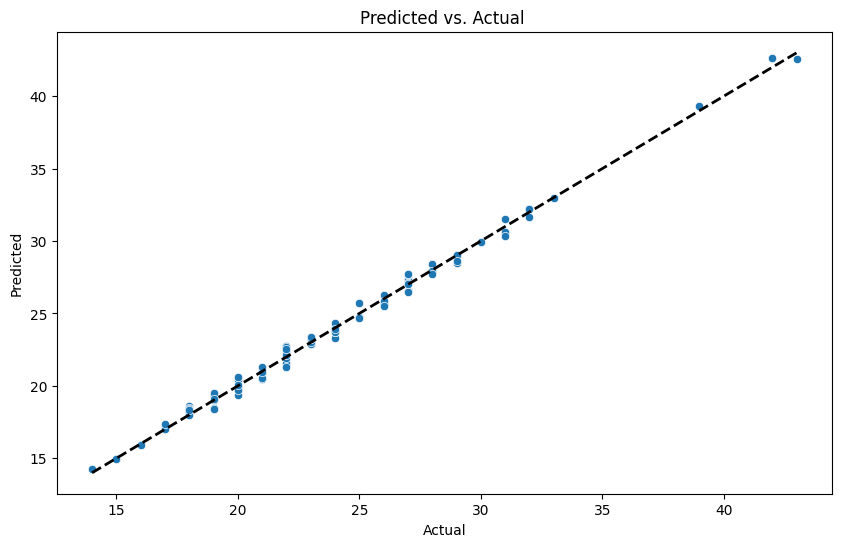

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=lr_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**RandomForestRegressor**

In [70]:
modelo_rfr = RandomForestRegressor()
modelo_rfr.fit(X_train, y_train)

RandomForestRegressor()

**Evaluacion del modelo**

In [71]:
evaluar_modelo(modelo_rfr, X_train, y_train, X_test, y_test)

Score: 0.9886952578132703
R2: 0.9886952578132703
mean_absolute_error: 0.2821818181818182
mean_squared_error: 0.30324363636363644
R_mean_squared_error: 0.5506756180943881


In [72]:
rfr_y_pred = modelo_rfr.predict(X_test)

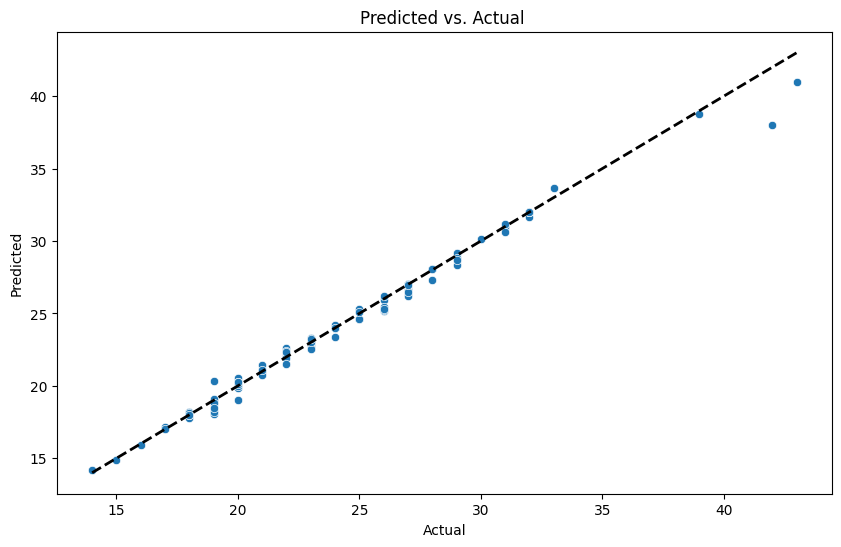

In [75]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=rfr_y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Predicted vs. Actual ')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

**from lazypredict**

In [77]:
modelo_lazy = LazyRegressor()
modelo_lazy, predicciones = modelo_lazy.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:02<00:00, 16.01it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000098 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 251
[LightGBM] [Info] Number of data points in the train set: 438, number of used features: 10
[LightGBM] [Info] Start training from score 23.712329
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

In [ ]:
print(modelo_lazy)

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.99       1.00  0.36        0.26
OrthogonalMatchingPursuitCV                  0.99       1.00  0.37        0.03
LassoCV                                      0.99       0.99  0.37        0.19
ElasticNetCV                                 0.99       0.99  0.37        0.17
LassoLarsCV                                  0.99       0.99  0.37        0.04
LarsCV                                       0.99       0.99  0.37        0.08
RidgeCV                                      0.99       0.99  0.37        0.02
Ridge                                        0.99       0.99  0.37        0.01
BayesianRidge                                0.99       0.99  0.37        0.02
RANSACRegressor                              0.99       0.99  0.37        0.02
LassoLarsIC                                  0.99   